# InstaBot - Part II

In [2]:
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from bs4 import BeautifulSoup
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#opening the browser, change the path as per location of chromedriver in your system
from selenium.webdriver.chrome.service import Service
service=Service(executable_path="F:\google drive\data science\webscraping\chromedriver-win64\chromedriver.exe")
options=webdriver.ChromeOptions()
driver=webdriver.Chrome(service=service,options=options)

In [4]:
#Opening Instagram using link
driver.get('https://www.instagram.com/')

In [5]:
# put your user name inplace of sample username and put your password in place of  sample password
Username='Sample username'
Password='Sample Password'

In [6]:
# intialize wait object using waitDriverWait methods
wait=WebDriverWait(driver,10)  # wait for 10 second

# Login to your Instagram

In [7]:

def login_insta(Username,Password):
    try:
        #locating username textbox and sending username
        username=driver.find_element('name','username')
        username.send_keys(Username)
        #locating password box and sending password
        password=driver.find_element('name','password')
        password.send_keys(Password)
        #locating login button 
        password.submit()
        # verify your code
        #code=input("enter a verification code")
        #verify=driver.find_element('name','verificationCode')
        #verify.send_keys(code)
        #verify.submit()

        #Save Your Login Info? : Not Now
        button = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class="_ac8f"]/div')))
        button.click()
       # pop_up=driver.find_element('class name','_ac8f')
        #pop_up.click()
        # turn Off and on notification: off
        pop_up1=driver.find_element('class name','_a9_1')
        pop_up1.click()
        #button1= wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class="_a9_1"]/div')))
        #button1.click()
        
       
        
    except TimeoutException :
        print ("Something went wrong! Try Again")
        
#Username=input("enter your username")
#Password=input("enter your password")
login_insta(Username,Password)      
        

In [8]:
##search_open_profile() function is same as part-I. All the functionality is same as before.
def search_open_profile(s):
    try:
        #locatong search box bar and sending text 
        search_box = wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"xjoudau")]/input')))
        search_box.send_keys(s)
        #locating serched result
        res = wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"x6s0dn4")]/div/a')))
        res.click()           
        time.sleep(2)
        #driver.back()
        Back=driver.find_element(By.XPATH,'//div[contains(@class,"x6s0dn4")]/div/div/span')
        Back.click()
        
    
    except TimeoutException :
        print('No Search Found!')

In [10]:
# search profile 'SoDelhi'
search_open_profile('SoDelhi')

# Problem 1 : Analyse the habits of bloggers

Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.<br>
1.From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and <br>
   find the top 5 which have the highest number of followers<br>
2.Now Find the number of posts these handles have done in the previous 3 days.<br>
3.Depict this information using a suitable graph.<br>

1.From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and <br> find the top 5 which have the highest number of followers

In [11]:
#First 10 handles from part-1
handles_list = ['dilsefoodie','foodtalkindia','foodmaniacinthehouse','food.darzee','yourfoodlab','dilsefoodie_','food',
               'foodnetwork','foodinsider','foodiesfeature']


In [12]:
#function for getting top 5 handle which have highest number of followers
def top_5_handles(lst):
    try:
        #dct contains username with number of followers
        dct = {}
        for i in lst :
            #This fuction will search a user and open that profile
            search_open_profile(i)
            time.sleep(2)
            #locating followers of user
            followers=driver.find_element(By.XPATH,'//ul[contains(@class,"x78zum5")]/li/a')
            #replacing ',' with '' and converted into int
            dct[i] = int(followers.get_attribute('title').replace(',' ,''))
        #top 5 most followed user
        count = 0
        res = OrderedDict()
        for i in sorted(dct, key=dct.get, reverse=True):
            res[i] = dct[i]
            count += 1
            if(count >= 5) : 
                break
                
        return res
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [59]:
top_handles = top_5_handles(handles_list)

In [132]:
print('Top 5 instagram handles which have the highest number of followers :')
for uname in top_handles:
    print(uname,'->',top_handles[uname])
    


Top 5 instagram handles which have the highest number of followers :
foodnetwork -> 10660374
foodinsider -> 2179026
yourfoodlab -> 1427415
dilsefoodie -> 630688
foodtalkindia -> 302538


2.Now Find the number of posts these handles have done in the previous 3 days.

In [172]:
#this function returns number of post posted by user in n days
def count_of_post(day):
    try :
        #locating first post
        post = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aagw')))
        post.click()
        
        count = 0 
        while True :
            #getting date of the the post
            temp = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aaqe')))
            #getting date in string format
            date_string = temp.get_attribute('datetime')
            #converting into date format
            date = datetime.strptime(date_string[0:19], "%Y-%m-%dT%H:%M:%S")
            #taking differnce between today's date and post posted date
            if (datetime.now() - date).days > day :
                break
            else :
                count += 1
            #locating next button
            next_but = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_abl-')))
            next_but.click()
        #closing the post
        close=driver.find_element(By.CLASS_NAME,"x160vmok")
        close.click()
        return count
    
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [185]:
total_post_count = {}
for i in top_handles :
    search_open_profile(i)
    time.sleep(2)
    count = count_of_post(3)
    total_post_count[i] = count

In [186]:
print('Number of posts these handles have done in the previous 3 days : -')
for i in total_post_count:
    print(i,total_post_count[i])

Number of posts these handles have done in the previous 3 days : -
foodnetwork 27
foodinsider 5
yourfoodlab 3
dilsefoodie 5
foodtalkindia 5


# 3.Depict this information using a suitable graph.

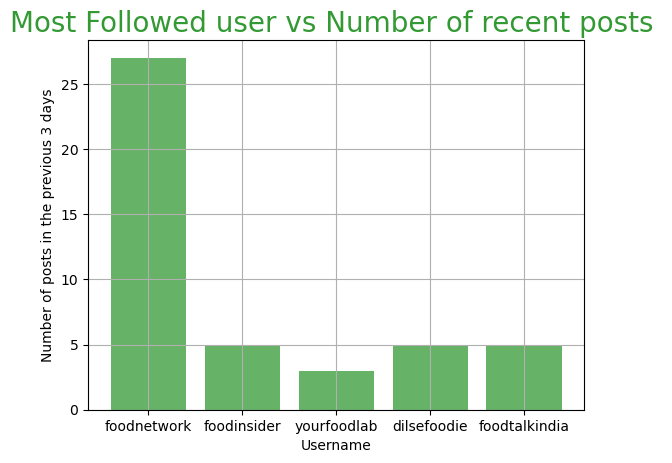

In [195]:
# using total_post_count to get username and number of post
x = total_post_count.keys()
y = total_post_count.values()
plt.bar(x,y,color='g',alpha=0.6)
plt.ylabel("Number of posts in the previous 3 days",size=10)
plt.xlabel("Username",size=10)
plt.title('Most Followed user vs Number of recent posts ',fontsize=20, color='green',alpha=0.8)
plt.grid()
plt.show()

# Problem 2 : List of hashtags

Your friend also needs a list of hashtags that he should use in his posts. <br>
1.Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.<br>
2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.<br>
3.Create a csv file with two columns : the word and its frequency <br>
4.Now, find the hashtags that were most popular among these bloggers <br>
5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.<br>

In [184]:

total_post_count={}
for i in l1:
    if i in total_post_count:
        total_post_count[i]+=1
    else:
        total_post_count[i]=1
print(total_post_count)


{'foodnetwork': 27, 'foodinsider': 5, 'yourfoodlab': 3, 'dilsefoodie': 5, 'foodtalkindia': 5}


In [13]:
def extract_content(lst):
    try :
        hashtags_list = []
        for user in lst:
            #This fuction will search a user and open that profile
            search_open_profile(user)
            time.sleep(2)
            #just for scrolling to getting post
            driver.execute_script('window.scrollTo(0, 3000);')
            time.sleep(2)
            driver.execute_script('window.scrollTo(0, -3000);')
            time.sleep(2)
            #locating the post of the user
            posts = driver.find_elements('class name','_aagw')
            for post in posts[:10]:
                post.click()
                time.sleep(2)
                #locating all hashtag used in this post
                hashtags=driver.find_elements(By.XPATH,'//h1[contains(@class,"_aacl")]/a')
                for hashtag in hashtags:
                    #appending in list
                    hashtags_list.append(hashtag.text)  
                
                #locating close button and clicking on it
                close=driver.find_element('class name',"x160vmok")
                time.sleep(1)
                close.click()
        return hashtags_list
    
    except TimeoutException :
        print ("Something went wrong! Try Again")
        

In [18]:
handles = list(total_post_count.keys())
hashtags = extract_content(handles)


In [19]:
print(hashtags)


['#VivsTips', '#DeliciousMissBrown', '#WhatADissapointment', '#FreakshowCakes', '#WorstCooks', '#WorstCooks', '#WorstCooks', '#WorstCooks', '#HalloweenBakingChampionship', '#SouthernKitchen', '#arizona', '#statefair', '#corndog', '#chili', '#cincinnati', '#midwest', '#kfc', '#kfclocker', '#kfcjapan', '#ukranian', '#newyorkcity', '#food', '#dumplings', '#amazon', '#amazonprimeday', '#primeday', '#primeday2020', '#kitchendeals', '#friedchicken', '#atlanta', '#chicken', '#thaifriedchicken', '#friedchicken', '#thaifood', '#losangeles', '#recipes', '#pulao', '#foodporn', '#brightwin', '#foodiesofinstagram', '#foodlover', '#rice', '#recipeoftheday', '#mumbaifoodie', '#sanjyotkeer', '#mumbaistreetfood', '#mumbaifood', '#recipe', '#foodie', '#foodstagram', '#dosa', '#dosalover', '#indianclicks', '#indiancuisine', '#streetfood', '#recipe', '#foodie', '#indiancuisine', '#streetfood', '#foodporn', '#comfortfood', '#streetphotography', '#sanjyotkeer', '#food', '#navratri', '#noonionnogarlic', '#fo

 # 2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word

In [23]:
dct = {}
words_list = []
for word in hashtags:
    dct[word] = dct.get(word,0) + 1
    
for i in sorted(dct, key=dct.get, reverse=True):
    words_list.append([i,dct[i]])
    print(i,dct[i])

#dilsefoodie 9
#sanjyotkeer 8
#foodporn 7
#streetfood 7
#recipe 6
#foodie 6
#comfortfood 6
#WorstCooks 4
#food 4
#recipeoftheday 4
#recipes 3
#foodiesofinstagram 3
#LesRochesConnect 3
#LesRochesWayOfLife 3
#GlionConnect 3
#GlionSpirit 3
#friedchicken 2
#mumbaifoodie 2
#mumbaistreetfood 2
#mumbaifood 2
#foodstagram 2
#indiancuisine 2
#yourfoodlab 2
#frankie 2
#paneer 2
#ContestAlert 2
#VivsTips 1
#DeliciousMissBrown 1
#WhatADissapointment 1
#FreakshowCakes 1
#HalloweenBakingChampionship 1
#SouthernKitchen 1
#arizona 1
#statefair 1
#corndog 1
#chili 1
#cincinnati 1
#midwest 1
#kfc 1
#kfclocker 1
#kfcjapan 1
#ukranian 1
#newyorkcity 1
#dumplings 1
#amazon 1
#amazonprimeday 1
#primeday 1
#primeday2020 1
#kitchendeals 1
#atlanta 1
#chicken 1
#thaifriedchicken 1
#thaifood 1
#losangeles 1
#pulao 1
#brightwin 1
#foodlover 1
#rice 1
#dosa 1
#dosalover 1
#indianclicks 1
#streetphotography 1
#navratri 1
#noonionnogarlic 1
#rolls 1
#streetstyle 1
#yummyfood 1
#noodles 1
#noodle 1
#reelsinstagram 1

 # 3.Create a csv file with two columns : the word and its frequency

In [24]:
df = pd.DataFrame(words_list,columns=['Words','Frequency'])
#using .to_csv pandas function to convert dataframe to csv
df.to_csv('words_frequency.csv',index=False)
df.head(10)

,Words,Frequency
0,#dilsefoodie,9
1,#sanjyotkeer,8
2,#foodporn,7
3,#streetfood,7
4,#recipe,6
5,#foodie,6
6,#comfortfood,6
7,#WorstCooks,4
8,#food,4
9,#recipeoftheday,4


 # 4.Now, find the hashtags that were most popular among these bloggers

In [25]:
print(words_list[0][0])

#dilsefoodie


# 5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

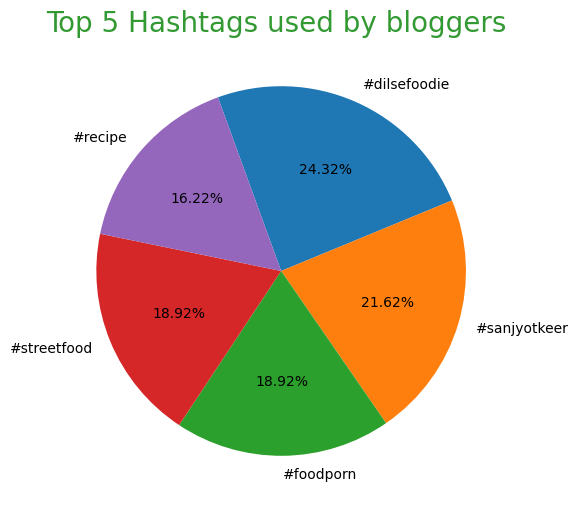

In [26]:
#using answer of problem 2.2
hashtag_name = [words_list[0][0],words_list[1][0],words_list[2][0],words_list[3][0],words_list[4][0]]
count = [words_list[0][1],words_list[1][1],words_list[2][1],words_list[3][1],words_list[4][1]]
plt.figure(figsize=(12,6))
plt.pie(count,labels=hashtag_name,autopct='%0.2f%%',radius=1,counterclock=False,startangle=110)
splt.show()

# Problem 3 : Followers : Likes ratio

You need to also calculate average followers : likes ratio for the obtained handles. Followers : Likes ratio is calculated as follows:<br>
1.Find out the likes of the top 10 posts of the 5 handles obtained earlier.<br>
2.Calculate the average likes for a handle.<br>
3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.<br>
4.Create a bar graph to depict the above obtained information.<br>

# 1.Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [14]:
#This function returns list of likes of 10 post of a user
def get_likes(user):
    try :
            likes = []
            #This fuction will search a user and open that profile
            search_open_profile(user)
            time.sleep(2)
            #just for scrolling
            driver.execute_script('window.scrollTo(0, 3000);')
            time.sleep(2)
            driver.execute_script('window.scrollTo(0, -3000);')
            time.sleep(2)
            #locating the post of the user
            posts = driver.find_elements('class name','_aagw')
            for post in posts[:10]:
                post.click()
                time.sleep(2)
                try : 
                    #for getting like on video we need to first click on view then only we can like
                    views = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aagw')))
                    views.click()
                    time.sleep(1)
                    
                    #locating like and clicking on it
                    like = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'x1lliihq')))
                    no_of_likes = (like.text).replace(',' , '')
                    likes.append(int(no_of_likes))
                    time.sleep(1)
                    #just clicking one body to get original post back
                    back=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_abl-')))
                    back.click()
                #if the post is image then this part will execute 
                except TimeoutException :
                    
                    like =wait.until(EC.presence_of_element_located((By.CLASS_NAME,'x1lliihq')))
                    no_of_likes = (like.text).replace(',' , '')
                    likes.append(int(no_of_likes))
                    time.sleep(1)
                #locating close button and clicking on it
                close=driver.find_element('class name',"x160vmok")
                time.sleep(1)
                close.click()
                                

                
            return likes
    
    except TimeoutException :
        print ("Something went wrong! Try Again")
        
    

In [44]:
#dct will store username with list of likes
dct = {}
for user in handles : 
    likes = get_likes(user)
    dct[user] = likes
    print('Number of likes of the top 10 posts of',user,':')
    for i in likes :
        print(i,'Likes')
    print()

Number of likes of the top 10 posts of foodnetwork :<br>
831 Likes  <br>
12235 Likes <br>
23784 Likes <br>
26151 Likes <br>
34927 Likes <br>
79026 Likes <br>
9103 Likes <br>
22217 Likes <br>
7951 Likes <br>
30405 Likes <br>

Number of likes of the top 10 posts of foodinsider : <br>
12529 Likes <br>
12284 Likes <br>
5130 Likes <br>
9746 Likes<br>
5597 Likes<br>
9250 Likes<br>
1395 Likes<br>
8525 Likes<br>
39934 Likes<br>
14760 Likes<br>

Number of likes of the top 10 posts of yourfoodlab :<br>
15800 Likes<br>
40727 Likes<br>
24199 Likes<br>
17368 Likes<br>
21351 Likes<br>
32545 Likes<br>
21447 Likes<br>
24166 Likes<br>
19154 Likes<br>
35241 Likes<br>

Number of likes of the top 10 posts of dilsefoodie : <br>
7187 Likes <br>
24663 Likes <br>
4868 Likes <br>
14497 Likes<br>
7696 Likes <br>
12616 Likes<br>
9900 Likes<br>
10937 Likes<br>
13709 Likes<br>
15620 Likes<br>

Number of likes of the top 10 posts of foodtalkindia :<br>
349 Likes<br>
241 Likes<br>
763 Likes<br>
667 Likes<br>
497 Likes<br>
187 Likes<br>
396 Likes<br>
661 Likes<br>
279 Likes<br>
1111 Likes


# 2.Calculate the average likes for a handle.

In [46]:
#This function will return a dictionary of {'username':average like}
def get_avg_likes(d):
    avg_likes = {}
    for key,val in d.items():
            avg = sum(val) // 10
            avg_likes[key] = avg
    return avg_likes

In [48]:
avg_likes = get_avg_likes(dct)

print('Average likes for each handle are :')
for user,likes in avg_likes.items():
    print(user, ':', likes)

Average likes for each handle are :
foodnetwork : 32050
foodinsider : 16875
yourfoodlab : 24599
dilsefoodie : 14179
foodtalkindia : 10000


# 3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle

In [15]:
#This function will return dictionary of {'username':avg followers-like ratio}
def getavg_foll_like_ratio(top_handles,avg_like,users):
    foll_like = {}
    for i in range(5) :
        foll_like[users[i]] = top_handles[users[i]]//avg_like[users[i]]
    return foll_like

In [51]:
#here I am using the answer of problem 1.1 which contains a dictionary of {'username':followers} ie top_handles
#extracing username from top_handles
top_handles_names = list(top_handles.keys())
#now calling function getavg_foll_like_ratio(top_handles,avg_like,users) 
avg_fol_like_ratio = getavg_foll_like_ratio(top_handles, avg_likes, top_handles_names)
print('Average followers:like ratio of each handle :')
for user,ratio in avg_fol_like_ratio.items():
    print(user, ':', ratio)

Average followers:like ratio of each handle :
foodnetwork : 432
foodinsider : 182
yourfoodlab : 56
dilsefoodie : 51
foodtalkindia : 587


# 4.Create a bar graph to depict the above obtained information.

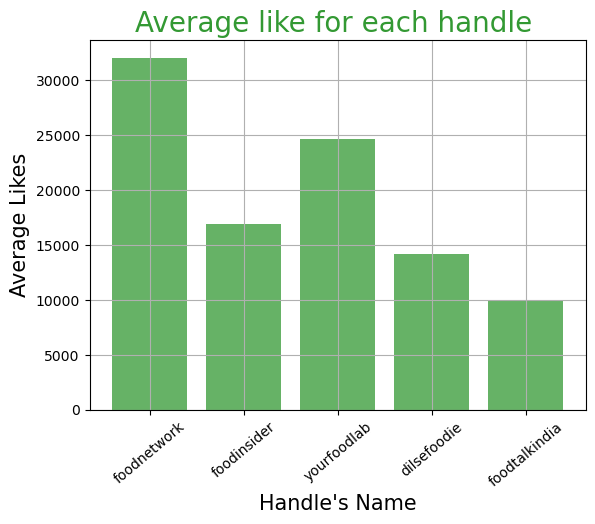

In [54]:
#Plotting Bar Graph for average likes of each handle
#for this I will use answer of problem 3.2 
username = list(avg_likes.keys())
avg_like = list(avg_likes.values())
plt.bar(username,avg_like,color='g',alpha=0.6)
plt.xticks(rotation=40)
plt.ylabel("Average Likes",size=15)
plt.xlabel("Handle's Name",size=15)
plt.title('Average like for each handle ',fontsize=20, color='green',alpha=0.8)
plt.grid()
plt.show()

# Plotting Bar Graph for average followers:like ratio of each handle

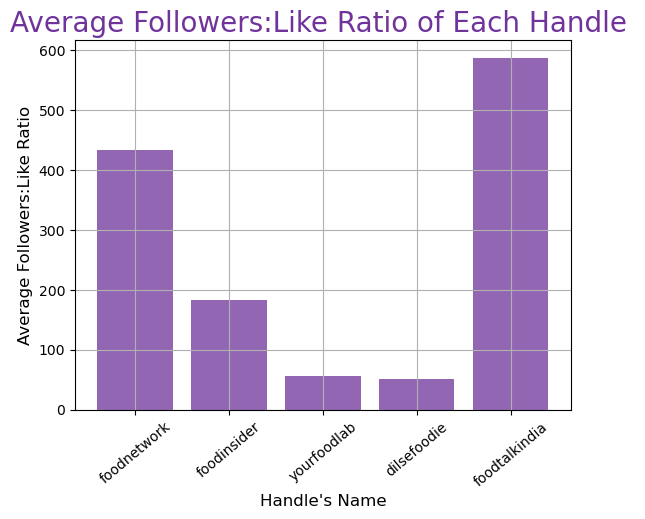

In [58]:
#For this I will use answer of problem 3.3
username = list(avg_fol_like_ratio.keys())
avg_like = list(avg_fol_like_ratio.values())

plt.bar(username,avg_like,color='Indigo',alpha=0.6)
plt.xticks(rotation=40)
plt.ylabel("Average Followers:Like Ratio",size=12)
plt.xlabel("Handle's Name",size=12)
plt.title('Average Followers:Like Ratio of Each Handle ',fontsize=20, color='Indigo',alpha=0.8)
plt.grid()
plt.show()